In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed


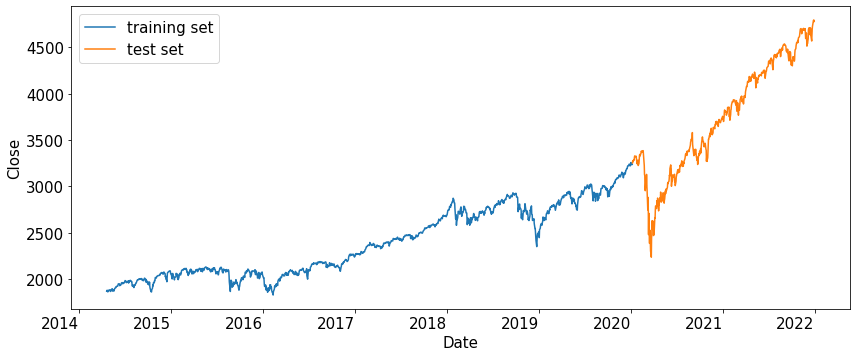

In [49]:
# get S&P 500 data
data = yf.download("^GSPC", start="2014-04-19", end="2021-12-31")
data['Close'].iloc[:-500].plot(subplots=True, figsize=(12,5),fontsize=15,label='training set')
data['Close'].iloc[-500:].plot(subplots=True, figsize=(12,5),fontsize=15,color='tab:orange',label='test set')

# data.to_csv('./test_data/S&P500_yfinance.csv')
plt.legend(fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.tight_layout()
plt.xlabel('Date',fontsize=15)
plt.savefig('../pics/sp500_raw_close_test_train.png',facecolor='w')

[*********************100%***********************]  1 of 1 completed


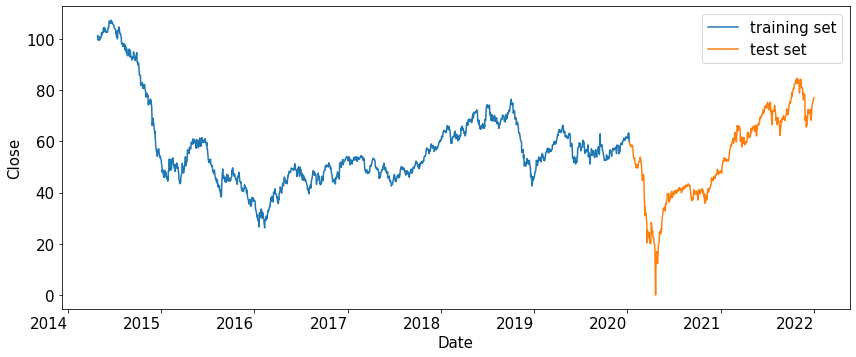

In [50]:
# get crude oil data
data = yf.download("CL=F", start="2014-04-29", end="2021-12-31")
data.loc['2020-04-20','Close'] = 0
data['Close'].iloc[:-500].plot(subplots=True, figsize=(12,5),fontsize=15,label='training set')
data['Close'].iloc[-500:].plot(subplots=True, figsize=(12,5),fontsize=15,color='tab:orange',label='test set')

# data.to_csv('./test_data/S&P500_yfinance.csv')
plt.legend(fontsize=15)# data.to_csv('./test_data/CrudeOil_yfinance.csv')
plt.ylabel('Close',fontsize=15)
plt.tight_layout()
plt.xlabel('Date',fontsize=15)
plt.savefig('../pics/CrudeOil_raw_close_test_train.png',facecolor='w')

In [40]:
data.loc['2020-04-20'] = 0 
data.loc['2020-04-20']

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Name: 2020-04-20 00:00:00, dtype: float64

In [35]:
data[data['Close'] < 0]


/tmp/ipykernel_9701/329293802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc['2020-04-20']['Close'] = 0


In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...,...
5357,2021-12-23,73.029999,73.949997,72.269997,73.790001,73.790001,270223
5358,2021-12-27,73.379997,76.089996,72.570000,75.570000,75.570000,268490
5359,2021-12-28,75.970001,76.919998,75.529999,75.980003,75.980003,249728
5360,2021-12-29,76.040001,77.370003,75.360001,76.559998,76.559998,283557


[*********************100%***********************]  1 of 1 completed


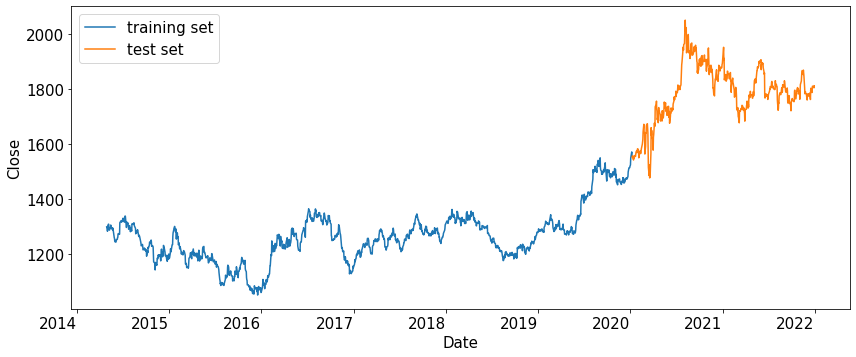

In [51]:
# get gold data
data = yf.download("GC=F", start="2014-04-29", end="2021-12-31")
data['Close'].iloc[:-500].plot(subplots=True, figsize=(12,5),fontsize=15,label='training set')
data['Close'].iloc[-500:].plot(subplots=True, figsize=(12,5),fontsize=15,color='tab:orange',label='test set')

# data.to_csv('./test_data/S&P500_yfinance.csv')
plt.legend(fontsize=15)# data.to_csv('./Gold_yfinance.csv')
plt.ylabel('Close',fontsize=15)
plt.tight_layout()
plt.xlabel('Date',fontsize=15)
plt.savefig('../pics/Gold_raw_close_test_train.png',facecolor='w')

[*********************100%***********************]  1 of 1 completed


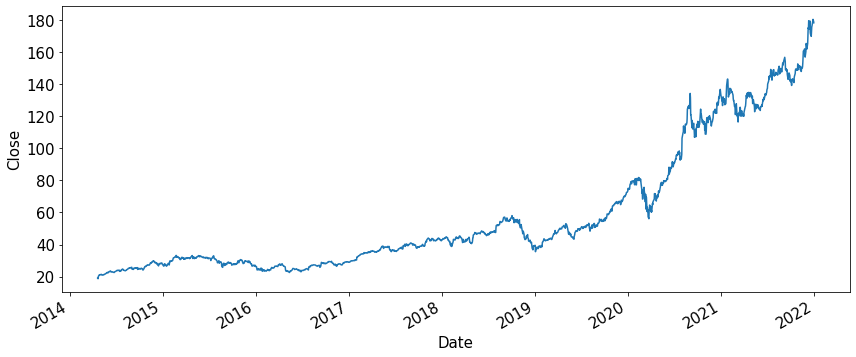

In [58]:
# get apple data
data = yf.download("AAPL", start="2014-04-19", end="2021-12-31")
data['Close'].iloc[:].plot(subplots=True, figsize=(12,5),fontsize=15,label='training set')
# data['Close'].iloc[-500:].plot(subplots=True, figsize=(12,5),fontsize=15,color='tab:orange',label='test set')

# data.to_csv('./test_data/S&P500_yfinance.csv')
# plt.legend(fontsize=15)# data.to_csv('../test_data/Apple_yfinance.csv')
plt.ylabel('Close',fontsize=15)
plt.tight_layout()
plt.xlabel('Date',fontsize=15)
plt.savefig('../pics/Apple_raw_closer.png',facecolor='w')


[*********************100%***********************]  1 of 1 completed


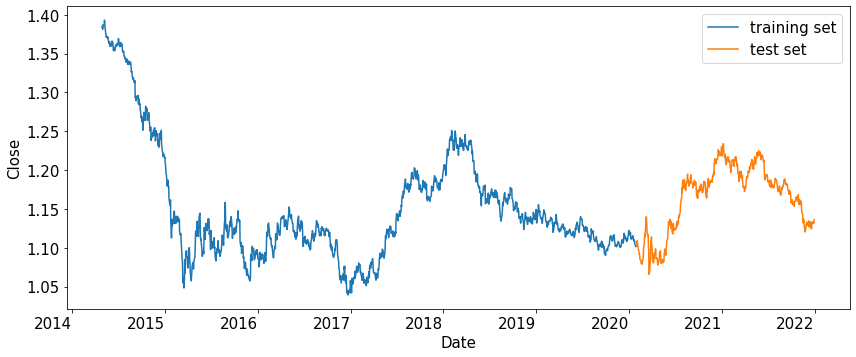

In [55]:
# get apple data
data = yf.download("EURUSD=X", start="2014-04-29", end="2021-12-31")
data['Close'].iloc[:-500].plot(subplots=True, figsize=(12,5),fontsize=15,label='training set')
data['Close'].iloc[-500:].plot(subplots=True, figsize=(12,5),fontsize=15,color='tab:orange',label='test set')

# data.to_csv('./test_data/S&P500_yfinance.csv')
plt.legend(fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.tight_layout()
plt.xlabel('Date',fontsize=15)
plt.savefig('./EurUsd_raw_close_test_train.png',facecolor='w')

# Lets look at some ACF plots

In [7]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

In [26]:
# load data
df = pd.read_csv('../test_data/S&P500_yfinance.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,1464.469971,1472.420044,1458.189941,1469.250000,1469.250000,374050000
1,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
3,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
4,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
...,...,...,...,...,...,...,...
5531,2021-12-23,4703.959961,4740.740234,4703.959961,4725.790039,4725.790039,2194630000
5532,2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
5533,2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
5534,2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000


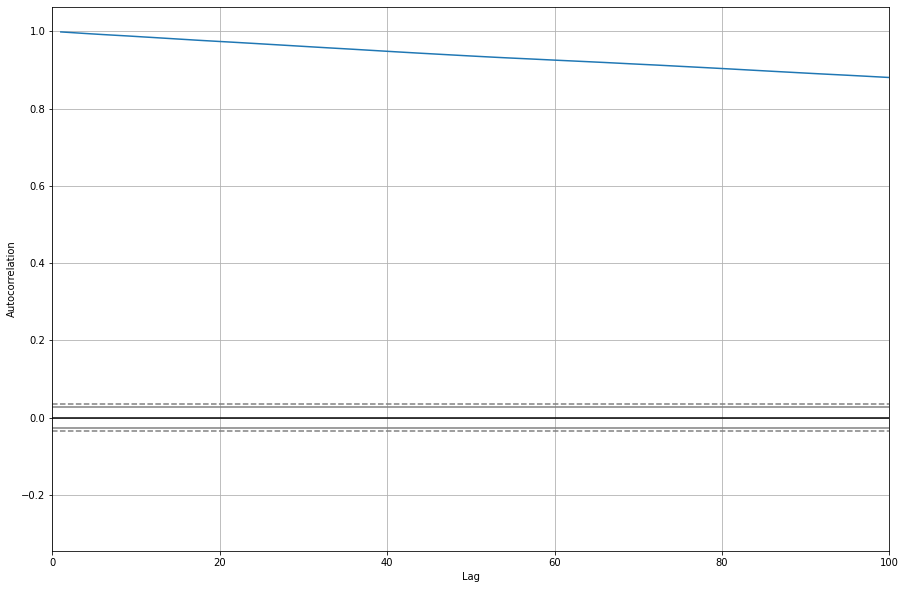

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax= plt.subplots(figsize=(15,10))
autocorrelation_plot(df['Close'].to_numpy(),ax=ax)#,lags=100)
plt.xlim([0,100])
plt.show()

# Let's look at some distributions

In [31]:
# load some data
df_apple = pd.read_csv('../test_data/Apple_yfinance.csv')

# subset data
df_apple = df_apple[['Date','Close']].iloc[-2000:,:]

# compute daily pct
df_apple['pct_change'] = df_apple['Close'].pct_change(periods=1)

# compute first difference
df_apple['diff'] =  df_apple['Close'].diff(periods=1)

# postive or negative pct
df_apple['pos_neg'] = df_apple['pct_change'].apply(lambda x: 1 if x > 0 else 0)

# postive or negative diff
df_apple['pos_neg_diff'] = df_apple['diff'].apply(lambda x: 1 if x > 0 else 0)

df_apple

,Date,Close,pct_change,diff,pos_neg,pos_neg_diff
3536,2014-01-23,19.863571,NaN,NaN,0,0
3537,2014-01-24,19.502501,-0.018178,-0.361071,0,0
3538,2014-01-27,19.660713,0.008112,0.158213,1,1
3539,2014-01-28,18.089287,-0.079927,-1.571426,0,0
3540,2014-01-29,17.883928,-0.011352,-0.205359,0,0
...,...,...,...,...,...,...
5531,2021-12-23,176.279999,0.003644,0.639999,1,1
5532,2021-12-27,180.330002,0.022975,4.050003,1,1
5533,2021-12-28,179.289993,-0.005767,-1.040009,0,0
5534,2021-12-29,179.380005,0.000502,0.090012,1,1


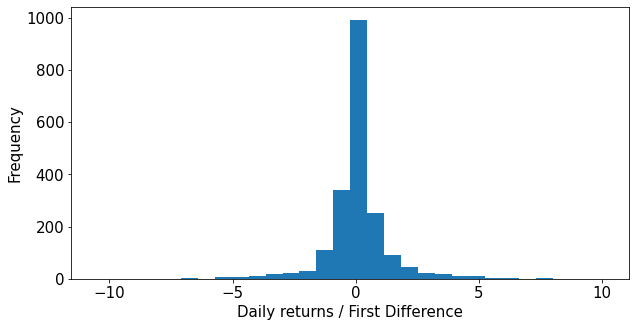

In [47]:
# plot some distribution of daily percentage change

fig, ax = plt.subplots(figsize=(10,5))
df_apple['diff'].plot(kind='hist',bins=30,ax=ax)
ax.tick_params(labelsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Daily returns / First Difference',fontsize=15)
plt.savefig('Apple_returns_distribution.png',facecolor='w')

In [29]:
# count number of positive and negative returns
df_apple.groupby(by='pos_neg').count()/2000

,Date,Close,pct_change
pos_neg,,,
0,0.4685,0.4685,0.4680
1,0.5315,0.5315,0.5315
